## PREPROCESSING AND MERGING OF DATASETS FOR FIT PREDICTION
### NAME: Priyanka Raju
### SJSU ID: 013839865

In [1]:
import pandas as pd
import numpy as np

# TO IMPUTE MISSING VALUES
from sklearn.impute import SimpleImputer

# CATEGORICAL TO NUMERICAL ENCODING
import category_encoders as ce

In [2]:
dfMod = pd.read_json('modcloth_final_data.json', lines=True)

In [3]:
dfRent = pd.read_json('renttherunway_final_data.json', lines=True)

### Looking into the details of the ModCloth dataset

In [4]:
dfMod.describe()

,bra size,hips,item_id,quality,shoe size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


In [5]:
dfMod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null object
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 11.4+ MB


In [6]:
dfMod.isnull().mean().round(4) * 100

bra size           7.27
bust              85.68
category           0.00
cup size           7.56
fit                0.00
height             1.34
hips              32.28
item_id            0.00
length             0.04
quality            0.08
review_summary     8.12
review_text        8.12
shoe size         66.28
shoe width        77.53
size               0.00
user_id            0.00
user_name          0.00
waist             96.52
dtype: float64

#### Dataset with feature 'waist' has 96% and feature 'bust' has 85% of missing data. Feature 'shoe size' has around 66% of missing values. Feature 'shoe width' has around 77% of missing values.

#### We can handle such kind of data set multiple ways

#### Based on the feature importance related to predicting the target we can either drop these columns from the training set or impute the missing values or convert them into classes/categories.

#### Feature 'hips' have around 32% missing data. For this column it might seem reasonable to impute the missing values by mean/median.

In [7]:
dfMod.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


#### values in 'height' column  are in format 'ft & in' which can be converted to cms for ModCloth dataset
https://techstudy.org/python/Write-a-Python-program-to-convert-height-in-feet-and-inches-to-centimeters

In [8]:
def get_height_in_cms(height):
    if type(height) == type(1.0):
        return
    try: 
        h_inch = int(height[4:-2])
        h_inch += int(height[0]) * 12
        h_cm = round(h_inch * 2.54, 1)        
        return h_cm
    except:
        return (int(height[0]) * 12 * 2.54)
    
dfMod['height'] = dfMod['height'].apply(get_height_in_cms)

### Looking into the details of Renttherunway dataset

In [9]:
dfRent.describe()

,age,item_id,rating,size,user_id
count,191584.000000,1.925440e+05,192462.000000,192544.000000,192544.000000
mean,33.871017,1.045684e+06,9.092371,12.245175,499494.100149
std,8.058083,8.053148e+05,1.430044,8.494877,289059.719328
min,0.000000,1.233730e+05,2.000000,0.000000,9.000000
25%,29.000000,1.950760e+05,8.000000,8.000000,250654.250000
50%,32.000000,9.483960e+05,10.000000,12.000000,499419.000000
75%,37.000000,1.678888e+06,10.000000,16.000000,750974.000000
max,117.000000,2.966087e+06,10.000000,58.000000,999997.000000


In [10]:
dfRent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
age               191584 non-null float64
body type         177907 non-null object
bust size         174133 non-null object
category          192544 non-null object
fit               192544 non-null object
height            191867 non-null object
item_id           192544 non-null int64
rating            192462 non-null float64
rented for        192534 non-null object
review_date       192544 non-null object
review_summary    192544 non-null object
review_text       192544 non-null object
size              192544 non-null int64
user_id           192544 non-null int64
weight            162562 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [11]:
dfRent.isnull().mean().round(4) * 100

age                0.50
body type          7.60
bust size          9.56
category           0.00
fit                0.00
height             0.35
item_id            0.00
rating             0.04
rented for         0.01
review_date        0.00
review_summary     0.00
review_text        0.00
size               0.00
user_id            0.00
weight            15.57
dtype: float64

####  Features 'bust' has 9.56%,'weight' has 15.57% and 'body type' has 7% of missing values

In [12]:
dfRent.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


#### values in 'height' column  are in format 'ft & in' which can be converted to cms for Rentherunway dataset
https://techstudy.org/python/Write-a-Python-program-to-convert-height-in-feet-and-inches-to-centimeters

In [13]:
def get_height_cms(height):
    if type(height) == type(1.0):
        return
    try: 
        h_inch = int(height[3:-1])
        h_inch += int(height[0]) * 12
        h_cm = round(h_inch * 2.54, 1)        
        return h_cm
    except:
        return (int(height[0]) * 12 * 2.54)

dfRent['height'] = dfRent['height'].apply(get_height_cms)

#### RenttheRunner dataset has the rating column on the scale of 1 to 10 and ModCloth dataset has the quality on the scale of 1  to 5. In order to merge the dataset we can convert the scale of RenttheRunner to scale of 1 to 5.

In [14]:
dfRent['quality'] = dfRent['rating']/2
dfRent = dfRent.drop(columns={'rating'},axis=1)

In [15]:
dfRent.head()

,age,body type,bust size,category,fit,height,item_id,rented for,review_date,review_summary,review_text,size,user_id,weight,quality
0,28.0,hourglass,34d,romper,fit,172.7,2260466,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs,5.0
1,36.0,straight & narrow,34b,gown,fit,167.6,153475,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs,5.0
2,116.0,NaN,NaN,sheath,fit,162.6,1063761,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,5.0
3,34.0,pear,34c,dress,fit,165.1,126335,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs,4.0
4,27.0,athletic,34b,gown,fit,175.3,616682,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs,5.0


### Merge the two datasets

In [16]:
mergedDF = dfMod.append(dfRent, sort=False,ignore_index=True)

In [17]:
mergedDF.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,...,size,user_id,user_name,waist,age,body type,bust size,rented for,review_date,weight
0,34.0,36,new,d,small,167.6,38.0,123373,just right,5.0,...,7,991571,Emily,29.0,NaN,NaN,NaN,NaN,NaN,NaN
1,36.0,NaN,new,b,small,157.5,30.0,123373,just right,3.0,...,13,587883,sydneybraden2001,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2,32.0,NaN,new,b,small,170.2,NaN,123373,slightly long,2.0,...,7,395665,Ugggh,30.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,...,21,875643,alexmeyer626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.0,NaN,new,b,small,157.5,NaN,123373,slightly long,5.0,...,18,944840,dberrones1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
mergedDF.describe()

,bra size,height,hips,item_id,quality,shoe size,size,user_id,waist,age
count,76772.000000,273550.000000,56064.000000,2.753340e+05,275184.000000,27915.000000,275334.000000,275334.000000,2882.000000,191584.000000
mean,35.972125,165.765608,40.358501,8.723788e+05,4.366686,8.145818,12.370390,499300.295212,31.319223,33.871017
std,3.224907,6.914054,5.827166,7.329026e+05,0.853706,1.336109,8.430614,288249.327638,5.302849,8.058083
min,28.000000,91.440000,30.000000,1.233730e+05,1.000000,5.000000,0.000000,6.000000,20.000000,0.000000
25%,34.000000,160.000000,36.000000,2.224670e+05,4.000000,7.000000,8.000000,251353.500000,28.000000,29.000000
50%,36.000000,165.100000,39.000000,6.552110e+05,5.000000,8.000000,12.000000,498924.000000,30.000000,32.000000
75%,38.000000,170.200000,43.000000,1.353371e+06,5.000000,9.000000,16.000000,749031.000000,34.000000,37.000000
max,48.000000,241.300000,60.000000,2.966087e+06,5.000000,38.000000,58.000000,999997.000000,50.000000,117.000000


In [19]:
mergedDF.shape

(275334, 24)

In [20]:
dfMod.shape

(82790, 18)

In [21]:
dfRent.shape

(192544, 15)

In [22]:
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275334 entries, 0 to 275333
Data columns (total 24 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          275334 non-null object
cup size          76535 non-null object
fit               275334 non-null object
height            273550 non-null float64
hips              56064 non-null float64
item_id           275334 non-null int64
length            82755 non-null object
quality           275184 non-null float64
review_summary    268609 non-null object
review_text       268609 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              275334 non-null int64
user_id           275334 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
age               191584 non-null float64
body type         177907 non-null object
bust size         174133 non-null object
rented for        192534 non-null 

In [23]:
data = {'Missing values Count': mergedDF.isnull().sum(),'Missing values Percentage': mergedDF.isnull().mean().round(4) * 100,
        'Data Type': mergedDF.dtypes}
nullDFcheck = pd.DataFrame(data=data) 
nullDFcheck

,Missing values Count,Missing values Percentage,Data Type
bra size,198562,72.12,float64
bust,263480,95.69,object
category,0,0.00,object
cup size,198799,72.20,object
fit,0,0.00,object
height,1784,0.65,float64
hips,219270,79.64,float64
item_id,0,0.00,int64
length,192579,69.94,object
quality,150,0.05,float64


## Preprocessing on the merged dataset

### Feature 'weight' values are represented in the format 'xxxlbs' and will be converting it into numeric readable/understandable format.

In [24]:
def get_weight(weight):
    if type(weight) == type(1.0):
        return
    weightN = int(weight[0:-3])        
    return weightN

mergedDF['weight'] = mergedDF['weight'].apply(get_weight)

In [25]:
mergedDF['weight'] = mergedDF['weight'].astype('float')

### Impute the missing values for 'weight' column with mean

In [26]:
weightImp = np.array(mergedDF['weight']).reshape(-1, 1)
imp = SimpleImputer(strategy='mean')
mergedDF['weight'] = imp.fit_transform(weightImp)

### The 'height' column has 0.65% of missing values we can impute the missing values by considering the mean factor

In [27]:
heightImp = np.array(mergedDF['height']).reshape(-1, 1)
imp = SimpleImputer(strategy='median')
mergedDF['height'] = imp.fit_transform(heightImp)

### We can consider dropping the columns 'waist','bust' since majority of values are missing and 'user_name' can also be dropped as we might not be using them for our analysis

In [28]:
mergedDF = mergedDF.drop(columns={'waist','bust','user_name'})

### 'quality' feature missing values can also be imputed with mean strategy

In [29]:
qualityImp = np.array(mergedDF['quality']).reshape(-1, 1)
imp = SimpleImputer(strategy='mean')
mergedDF['quality'] = imp.fit_transform(qualityImp)

### 'shoe width' feature missing values can be specified as 'Unspecifed' and this feature can be considered as categorical

In [30]:
mergedDF['shoe width'].sort_values(ascending=True).unique()

array(['average', 'narrow', 'wide', nan], dtype=object)

In [31]:
mergedDF['shoe width'].fillna('Unspecified', inplace=True)
mergedDF['shoe width'] = mergedDF['shoe width'].astype('category')

### 'shoe size' feature can either be considered as categorical or can also be considered as numerical. For our analysis purpose i have retained it to be a numerical feature replacing the missing values with 0 which indicated that customer has not entered any details

In [32]:
mergedDF['shoe size'].sort_values(ascending=True).unique()

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 38. ,  nan])

In [33]:
mergedDF['shoe size'].fillna(0, inplace=True)
mergedDF['shoe size'] = mergedDF['shoe size'].astype('float')

### 'length' feature can be considered as categorical and the missing values can be replaced with a category called 'Unspecified'

In [34]:
mergedDF['length'].sort_values(ascending=True).unique()

array(['just right', 'slightly long', 'slightly short', 'very long',
       'very short', nan], dtype=object)

In [35]:
mergedDF['length'].fillna('Unspecified', inplace=True)
mergedDF['length'] = mergedDF['length'].astype('category')

### 'Hips' feature can be imputed for missing values with the mean strategy

In [36]:
hipImp = np.array(mergedDF['hips']).reshape(-1, 1)
imp = SimpleImputer(strategy='mean')
mergedDF['hips'] = imp.fit_transform(hipImp)

### 'cup size' feature can be considered as categorical and missing values can be replaced with class 'Unspecified'

In [37]:
mergedDF['cup size'].sort_values(ascending=True).unique()

array(['a', 'aa', 'b', 'c', 'd', 'dd/e', 'ddd/f', 'dddd/g', 'h', 'i', 'j',
       'k', nan], dtype=object)

In [38]:
mergedDF['cup size'].fillna('Unspecified', inplace=True)
mergedDF['cup size'] = mergedDF['cup size'].astype('category')

### 'bra size' feature can be considered as numeric type for our analysis and the missing values can be replaced with median 

In [39]:
mergedDF['bra size'].sort_values(ascending=True).unique()

array([28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., nan])

In [40]:
bSizeImp = np.array(mergedDF['bra size']).reshape(-1, 1)
imp = SimpleImputer(strategy='median')
mergedDF['bra size'] = imp.fit_transform(bSizeImp)

### 'rented for' feature can be considered as categorical and missing values can be replaced with class 'Unspecified'

In [41]:
mergedDF['rented for'].sort_values(ascending=True).unique()

array(['date', 'everyday', 'formal affair', 'other', 'party',
       'party: cocktail', 'vacation', 'wedding', 'work', nan],
      dtype=object)

In [42]:
mergedDF['rented for'].fillna('Unspecified', inplace=True)
mergedDF['rented for'] = mergedDF['rented for'].astype('category')

### 'body type' feature can be considered as categorical and missing values can be replaced with class 'Unspecified'

In [43]:
mergedDF['body type'].sort_values(ascending=True).unique()

array(['apple', 'athletic', 'full bust', 'hourglass', 'pear', 'petite',
       'straight & narrow', nan], dtype=object)

In [44]:
mergedDF['body type'].fillna('Unspecified', inplace=True)
mergedDF['body type'] = mergedDF['body type'].astype('category')

### 'age' feature impute the missing values with median value

In [45]:
ageImp = np.array(mergedDF['age']).reshape(-1, 1)
imp = SimpleImputer(strategy='mean')
mergedDF['age'] = imp.fit_transform(ageImp)

In [46]:
mergedDF['age'] = mergedDF['age'].astype('int')

### 'bust size' feature can be considered as categorical and missing values can be replaced with class 'Unspecified'

In [47]:
mergedDF['bust size'].sort_values(ascending=True).unique()

array(['28a', '28aa', '28b', '28c', '28d', '28dd', '28ddd/e', '28f',
       '28g', '28h', '28i', '30a', '30aa', '30b', '30c', '30d', '30dd',
       '30ddd/e', '30f', '30g', '30h', '30i', '32a', '32aa', '32b', '32c',
       '32d', '32d+', '32dd', '32ddd/e', '32f', '32g', '32h', '32i',
       '32j', '34a', '34aa', '34b', '34c', '34d', '34d+', '34dd',
       '34ddd/e', '34f', '34g', '34h', '34i', '34j', '36a', '36aa', '36b',
       '36c', '36d', '36d+', '36dd', '36ddd/e', '36f', '36g', '36h',
       '36i', '36j', '38a', '38aa', '38b', '38c', '38d', '38d+', '38dd',
       '38ddd/e', '38f', '38g', '38h', '38i', '38j', '40b', '40c', '40d',
       '40dd', '40ddd/e', '40f', '40g', '40h', '40i', '40j', '42b', '42c',
       '42d', '42dd', '42ddd/e', '42f', '42g', '42h', '42j', '44b', '44c',
       '44d', '44dd', '44ddd/e', '44f', '44g', '44h', '46c', '46ddd/e',
       '46f', '48d', '48dd', nan], dtype=object)

In [48]:
mergedDF['bust size'].fillna('Unspecified', inplace=True)
mergedDF['bust size'] = mergedDF['bust size'].astype('category')

### 'review_date' feature can be dropped as we will not be considering this attribute for our analysis

In [49]:
mergedDF = mergedDF.drop(columns={'review_date'})

### feature 'category' can be considered as categorical

In [50]:
mergedDF['category'].sort_values(ascending=True).unique()

array(['ballgown', 'blazer', 'blouse', 'blouson', 'bomber', 'bottoms',
       'buttondown', 'caftan', 'cami', 'cape', 'cardigan', 'coat',
       'combo', 'crewneck', 'culotte', 'culottes', 'down', 'dress',
       'dresses', 'duster', 'for', 'frock', 'gown', 'henley', 'hoodie',
       'jacket', 'jeans', 'jogger', 'jumpsuit', 'kaftan', 'kimono',
       'knit', 'legging', 'leggings', 'maxi', 'midi', 'mini', 'new',
       'outerwear', 'overalls', 'overcoat', 'pant', 'pants', 'parka',
       'peacoat', 'poncho', 'print', 'pullover', 'romper', 'sale',
       'sheath', 'shift', 'shirt', 'shirtdress', 'skirt', 'skirts',
       'skort', 'suit', 'sweater', 'sweatershirt', 'sweatpants',
       'sweatshirt', 't-shirt', 'tank', 'tee', 'tight', 'top', 'tops',
       'trench', 'trouser', 'trousers', 'tunic', 'turtleneck', 'vest',
       'wedding'], dtype=object)

In [51]:
mergedDF['category'] = mergedDF['category'].astype('category')

### We can notice that quite a few features are duplicated with similar labels and this can be cleaned by updated the duplicate values 
#### For example 'skirt' 'skirts' & 'skort' falls under same category and we can group them together

In [52]:
mergedDF['category'] = mergedDF['category'].replace(['skirts','skort'],'skirt')
mergedDF['category'] = mergedDF['category'].replace(['culottes'],'culotte')
mergedDF['category'] = mergedDF['category'].replace(['pants'],'pant')
mergedDF['category'] = mergedDF['category'].replace(['tops'],'top')
mergedDF['category'] = mergedDF['category'].replace(['dresses'],'dress')
mergedDF['category'] = mergedDF['category'].replace(['legging'],'leggings')
mergedDF['category'] = mergedDF['category'].replace(['blouson'],'blouse')
mergedDF['category'] = mergedDF['category'].replace(['trousers'],'trouser')
mergedDF['category'] = mergedDF['category'].replace(['down'],'gown')
mergedDF['category'] = mergedDF['category'].replace(['for'],'frock')
mergedDF['category'] = mergedDF['category'].replace(['caftan'],'kaftan')
mergedDF['category'] = mergedDF['category'].replace(['shift'],'shirt')
mergedDF['category'] = mergedDF['category'].replace(['tee'],'t-shirt')
mergedDF['category'] = mergedDF['category'].replace(['sweatershirt'],'sweatshirt')

In [53]:
mergedDF['category'].unique()

[new, dress, wedding, sale, top, ..., crewneck, parka, buttondown, sweatpants, jeans]
Length: 60
Categories (60, object): [new, dress, wedding, sale, ..., parka, buttondown, sweatpants, jeans]

### convert the feature 'fit' from categorical to numeric and create new feature 'fit_to_numeric'. This is be our target variable

In [54]:
mergedDF['fit'] = mergedDF['fit'].astype('category')

In [55]:
mappingFit=[{'col': 'fit','mapping': {'small': 1, 'fit': 2, 'large': 3}}]

ceOrdFit = ce.OrdinalEncoder(cols=['fit'],return_df=True,mapping=mappingFit)
mergedDF['fit_to_numeric'] = ceOrdFit.fit_transform(mergedDF['fit'])

### features 'review_text' and 'review_summary' can be used when considering the opinion mining analysis but for analysis we are not considering these features

In [56]:
mergedDF = mergedDF.drop(columns={'review_text','review_summary'},axis=1)

In [57]:
mergedDF.head(10)

,bra size,category,cup size,fit,height,hips,item_id,length,quality,shoe size,shoe width,size,user_id,age,body type,bust size,rented for,weight,fit_to_numeric
0,34.0,new,d,small,167.6,38.000000,123373,just right,5.0,0.0,Unspecified,7,991571,33,Unspecified,Unspecified,Unspecified,137.391709,1
1,36.0,new,b,small,157.5,30.000000,123373,just right,3.0,0.0,Unspecified,13,587883,33,Unspecified,Unspecified,Unspecified,137.391709,1
2,32.0,new,b,small,170.2,40.358501,123373,slightly long,2.0,9.0,Unspecified,7,395665,33,Unspecified,Unspecified,Unspecified,137.391709,1
3,36.0,new,dd/e,fit,165.1,40.358501,123373,just right,5.0,0.0,Unspecified,21,875643,33,Unspecified,Unspecified,Unspecified,137.391709,2
4,36.0,new,b,small,157.5,40.358501,123373,slightly long,5.0,0.0,Unspecified,18,944840,33,Unspecified,Unspecified,Unspecified,137.391709,1
5,36.0,new,c,small,162.6,41.000000,123373,just right,5.0,0.0,Unspecified,11,162012,33,Unspecified,Unspecified,Unspecified,137.391709,1
6,32.0,new,b,large,160.0,40.358501,123373,just right,1.0,0.0,Unspecified,5,114843,33,Unspecified,Unspecified,Unspecified,137.391709,3
7,38.0,new,d,small,165.1,42.000000,123373,just right,5.0,8.5,Unspecified,11,58869,33,Unspecified,Unspecified,Unspecified,137.391709,1
8,42.0,new,d,small,177.8,50.000000,123373,just right,4.0,11.0,wide,30,279568,33,Unspecified,Unspecified,Unspecified,137.391709,1
9,36.0,new,dd/e,fit,167.6,41.000000,123373,just right,5.0,9.0,Unspecified,13,950172,33,Unspecified,Unspecified,Unspecified,137.391709,2


In [58]:
pd.DataFrame({'missing values count': mergedDF.isnull().sum(),' missing values Percentage': mergedDF.isnull().mean().round(4) * 100,
              'Data Type': mergedDF.dtypes})

,missing values count,missing values Percentage,Data Type
bra size,0,0.0,float64
category,0,0.0,category
cup size,0,0.0,category
fit,0,0.0,category
height,0,0.0,float64
hips,0,0.0,float64
item_id,0,0.0,int64
length,0,0.0,category
quality,0,0.0,float64
shoe size,0,0.0,float64


In [59]:
mergedDF.shape

(275334, 19)

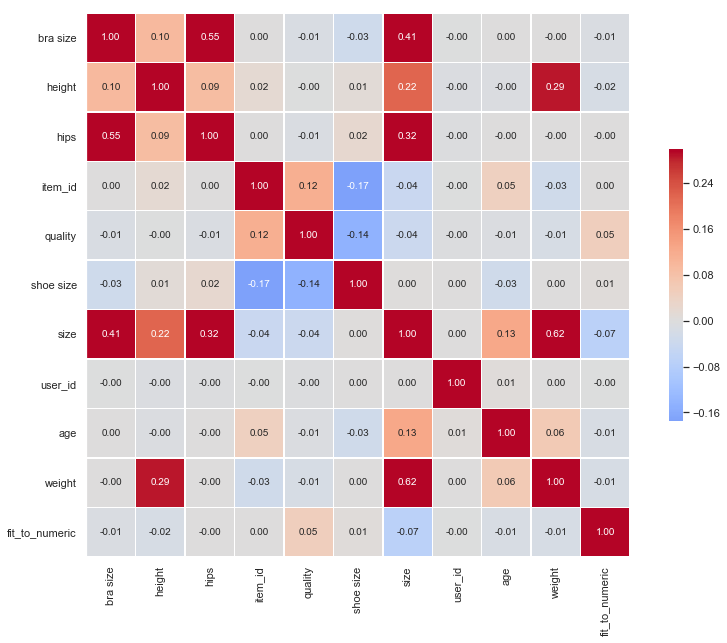

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
corr = mergedDF.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

### Save the merged dataset to a json file which can be accessed in other files for algorithm implementations

In [61]:
mergedDF.to_json('updatedFitDF.json',lines=True,orient='records')

### REFERENCES

https://contrib.scikit-learn.org/categorical-encoding/index.html

https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation

https://seaborn.pydata.org/